# PTC Covariances


In [1]:
! eups list -s | grep lsst_distrib

lsst_distrib          g4213664e8e+d2de98b762 	w_2023_46 setup


In [2]:
slacAmps = {'C10':'AMP01','C11':'AMP02','C12':'AMP03','C13':'AMP04',\
           'C14':'AMP05','C15':'AMP06','C16':'AMP07','C17':'AMP08',\
           'C07':'AMP09','C06':'AMP10','C05':'AMP11','C04':'AMP12',\
           'C03':'AMP13','C02':'AMP14','C01':'AMP15','C00':'AMP16'}### Single Amplifier:

In [6]:
slacAmps = {'C10':'AMP01','C11':'AMP02','C12':'AMP03','C13':'AMP04',\
           'C14':'AMP05','C15':'AMP06','C16':'AMP07','C17':'AMP08',\
           'C07':'AMP09','C06':'AMP10','C05':'AMP11','C04':'AMP12',\
           'C03':'AMP13','C02':'AMP14','C01':'AMP15','C00':'AMP16'}


def get_prekernel_matrix(inputPtc, amp, cov_sample): 
    mask = np.zeros(inputPtc.rawMeans[amp].shape, dtype=bool) # added
    index = np.argmin( ( np.asarray(inputPtc.rawMeans[amp]) - cov_sample )**2 )
    mask[index] = True # added
            
    _n = inputPtc.noiseMatrix[amp] 
    _g  = inputPtc.gain[amp] 
    _mu = np.asarray(inputPtc.rawMeans[amp])[mask]
    _C_model = np.asarray(inputPtc.covariancesModel[amp])[mask]

    A = (_C_model[0] / _mu**2) - (_n/_g**2)/(_mu**2)
    A[0][0] = (_C_model[0][0][0] / _mu**2) - (_mu/_g + _n[0][0]/_g**2)/(_mu**2)
    
    
    
    return A

slacAmps2 = {y: x for x, y in slacAmps.items()}
from lsst.daf.butler import Butler
butler = Butler("/repo/ir2")

In [7]:
import matplotlib.gridspec as gridspec

from lsst.daf.butler import Butler

from lsst.obs.lsst import LsstCam
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from astropy.io import fits
matplotlib.rcParams.update({'font.size': 13})

In [8]:
#h = fits.open("/sdf/group/rubin/repo/ir2/u/abrought/ptc.13511.trunc_to_pcti/20231117T182139Z/ptc/ptc_LSSTCam_R03_S12_u_abrought_ptc_13511_trunc_to_pcti_20231117T182139Z.fits")
#h.info()

In [ ]:
amp=2
mu = h[1].data['RAW_MEANS'][amp]
g = h[1].data['GAIN'][amp]
c00 = h[1].data['RAW_VARS'][amp]
c00_model = h[1].data['COVARIANCES_MODEL'][amp].reshape(400,15,15)[:,0,0]
#expmask = ptc.expIdMask[ampName]

n = h[1].data['NOISE'][amp]
print(n)
r = (c00 / mu**2) - (mu/g + n/g**2)/(mu**2)
r_model = (c00_model / mu**2) - (mu/g + n/g**2)/(mu**2)

In [ ]:
plt.scatter(mu*g,r, marker="o", edgecolor="r", s=5,  facecolor="None", label="13522 (uv)", alpha=0.5)#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])
#plt.plot(mu*g,r_model, "o-", ms=0, c="r")#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0), useMathText=True)
plt.xlim(0,2.0e5)
plt.ylim(-.25e-5,0e-5)
plt.legend(ncol=2)
plt.xlabel(r"$\mu$ [el]")
plt.title("R03-S12 (det=23), C00")
plt.ylabel("$C_{00}/\mu^2 - (\mu/g + n_{00}/g^{2})/\mu^2$")

37.72206449239044


Text(0, 0.5, '$C_{00}/\\mu^2 - (\\mu/g + n_{00}/g^{2})/\\mu^2$')

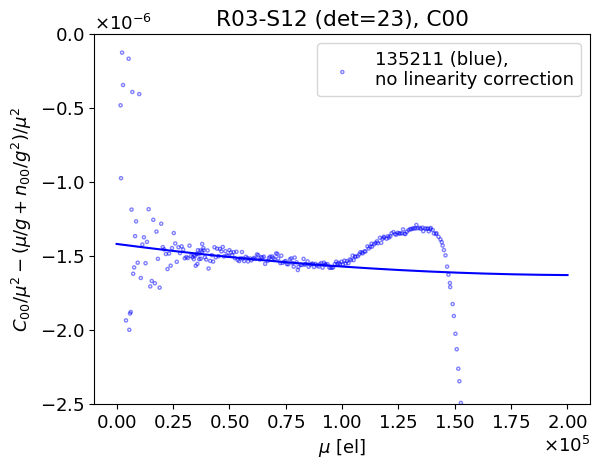

In [11]:
butler = Butler("/repo/ir2") 
registry = butler.registry
registry.refresh()
ptc =  butler.get('ptc', detector=23, instrument='LSSTCam', collections='u/abrought/ptc.13511.DM-41754.DM-41681.condensed')

ampName="C00"
mu2 = ptc.rawMeans[ampName]
g2 = ptc.gain[ampName]
c002 = ptc.rawVars[ampName]
c00_model2 = ptc.covariancesModel[ampName][:,0,0]
expmask2 = ptc.expIdMask[ampName]

n2 = ptc.noise[ampName]
print(n2)
r2 = (c002 / mu2**2) - (mu2/g2 + n2/g2**2)/(mu2**2)
r_model2 = (c00_model2 / mu2**2) - (mu2/g2 + n2/g2**2)/(mu2**2)


#plt.scatter(mu*g,r, marker="o", edgecolor="r", s=5,  facecolor="None", label="13511 (blue)", alpha=0.5)#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])
plt.scatter(mu2*g2,r2, marker="o", edgecolor="b", s=5,  facecolor="None", label="135211 (blue),\nno linearity correction", alpha=0.5)#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])

#plt.plot(mu*g,r_model, "o-", ms=0, c="r")#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])
plt.plot(mu2*g2,r_model2, "o-", ms=0, c="b")#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])

plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0), useMathText=True)
# plt.axvline(np.min(pcti_turnoffs) , linestyle=":", color="black", label="pCTI turnoff", alpha=0.5)
# plt.axvline(np.min(ptc_turnoffs) , linestyle="--", color="black", label="PTC turnoff", alpha=0.5)
# print(np.min(pcti_turnoffs))
#plt.xlim(0,2.0e5)
plt.ylim(-.25e-5,0e-5)
plt.legend(ncol=2)
plt.ylim(-.25e-5,0e-5)
plt.xlabel(r"$\mu$ [el]")
plt.title("R03-S12 (det=23), C00")
plt.ylabel("$C_{00}/\mu^2 - (\mu/g + n_{00}/g^{2})/\mu^2$")

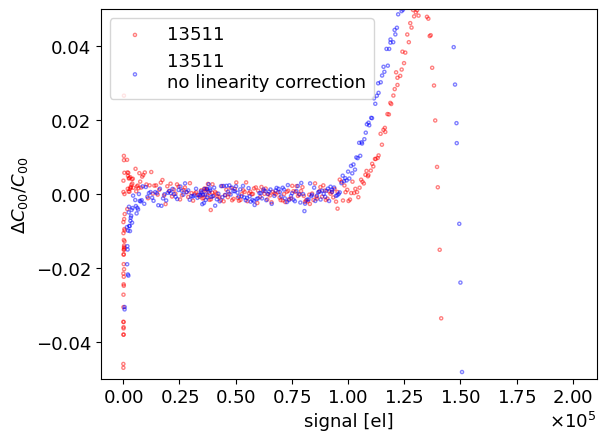

In [31]:
plt.scatter(mu*g,(c00-c00_model)/c00_model, marker="o", edgecolor="r", s=5,  facecolor="None", label="13511", alpha=0.5)#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])
plt.scatter(mu2*g2,(c002-c00_model2)/c00_model2, marker="o", edgecolor="b", s=5,  facecolor="None", label="13511\nno linearity correction", alpha=0.5)#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])
plt.ylim(-.05,.05)
plt.xlabel("signal [el]")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
plt.ylabel("$\Delta C_{00} / C_{00}$")
plt.legend()

# Previous

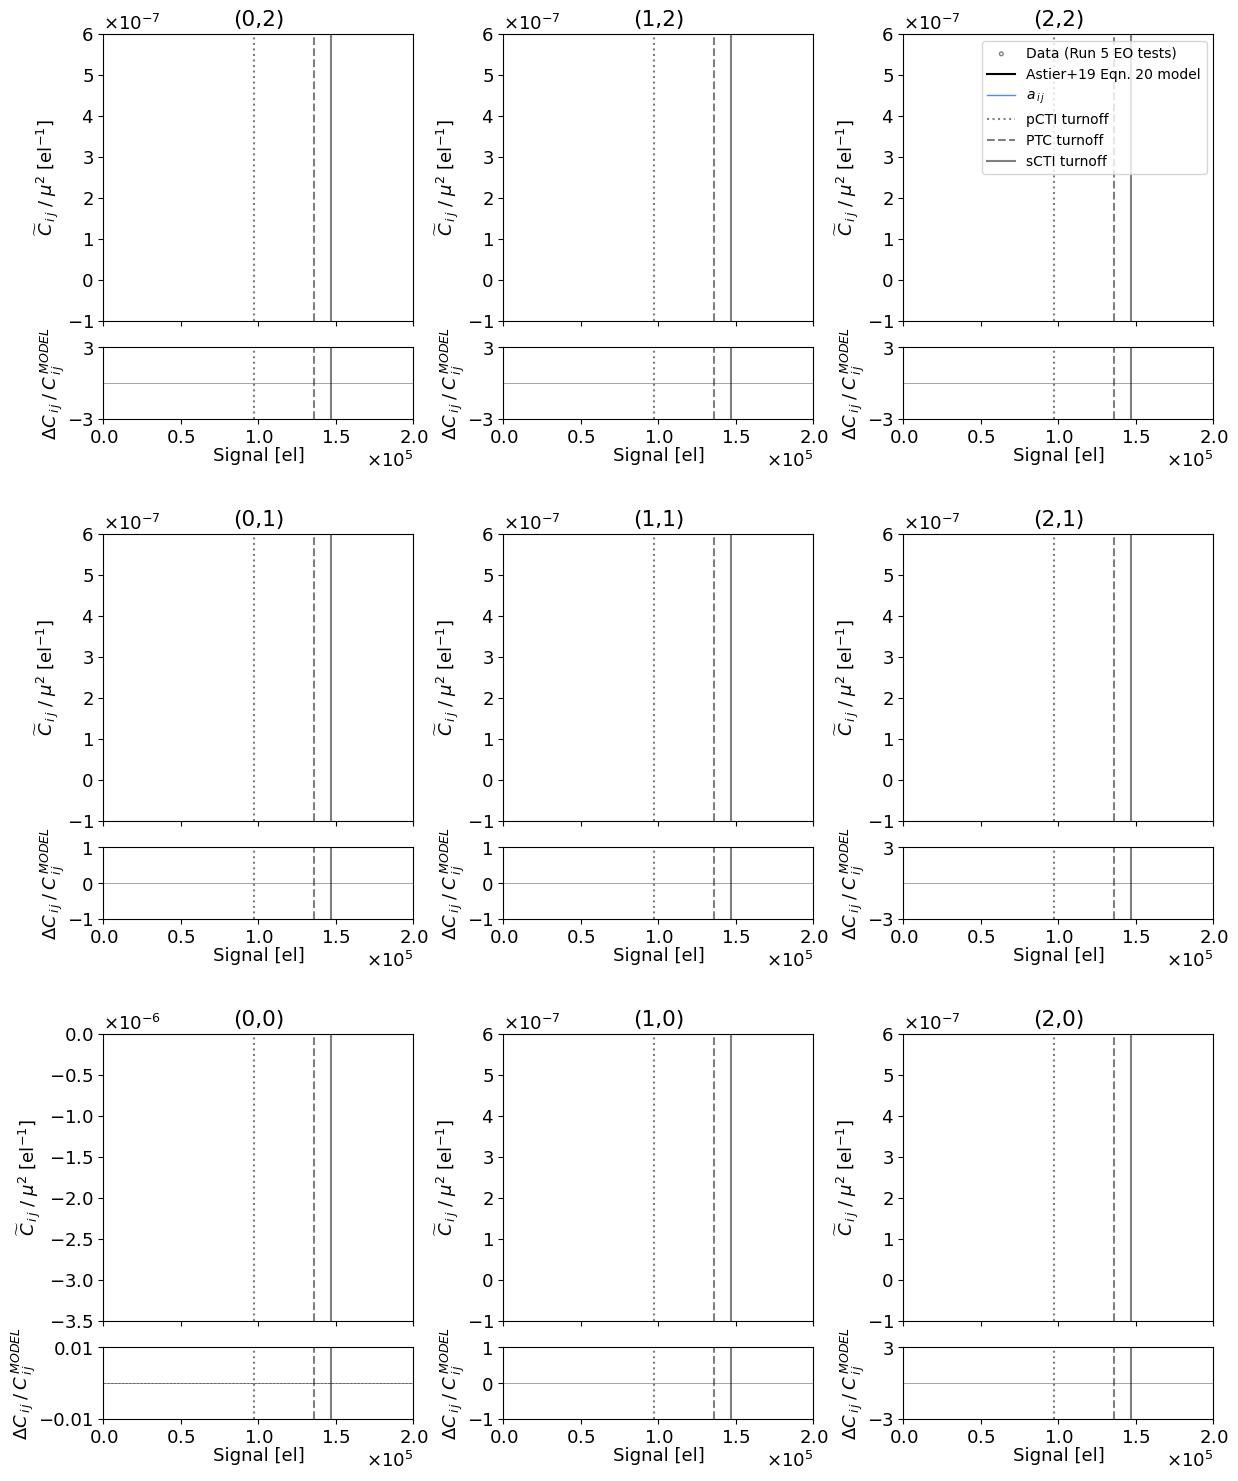

In [5]:
import matplotlib.gridspec as gridspec

from lsst.daf.butler import Butler

from lsst.obs.lsst import LsstCam
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 13})

# 45652.31107039715
# 35515.38594079467

sensor="R03_S12"
det = 23
fa = 0.791
amp = 'C00'
butler = Butler("/repo/ir2") 
ptc = butler.get('ptc', detector=det, instrument='LSSTCam', collections='u/abrought/ptc.13522.trunc_to_pcti')

import sys
sys.path.append('/home/a/abrought/bin')
from SpotAnalysis import *
ptc_turnoffs, scti_turnoffs, pcti_turnoffs, moss, gains = getSensorData(sensor=sensor, detector=det)

camera = LsstCam().getCamera()
detector = camera.get(sensor)

def avg_dict(d, exclude_channels=[]):

        t = np.zeros((8,8))
        for k,channel in zip(d.values(), d.keys()):
            if channel in exclude_channels:
                continue

            t += k
        return t / len(d.values())

def avg_dict2(d, exclude_channels=[]):

        t = np.zeros((338,8,8))
        for k,channel in zip(d.values(), d.keys()):
            if channel in exclude_channels:
                continue

            t += k
        return t / len(d.values())

gains = []
for l, channel in enumerate(camera[0].getAmplifiers()):
    #print(l,channel.getName())
    gains.append(ptc.gain[channel.getName()])

fig = plt.figure(figsize=(12,15))
gs = gridspec.GridSpec(2, 1, height_ratios=[4,1], hspace=0.3*.5)
sub_fig = fig.subfigures(3, 3)
for i in range(3):
    for j in range(3): # 00->20 01->10
        ax1 = sub_fig[2-j][i].add_subplot(gs[0])
        ax2 = sub_fig[2-j][i].add_subplot(gs[1])
        l = 0
        mask = np.asarray(ptc.expIdMask[amp])
        n  = ptc.noiseMatrix[amp]
        g  = ptc.gain[amp] 
        mu = np.asarray(ptc.rawMeans[amp])
        C  = np.asarray(ptc.covariances[amp])[:,i,j]
        C_model = np.asarray(ptc.covariancesModel[amp])[:,i,j]
        if i==0 and j==0 and l==0:
            ax1.scatter(mu*g, (C / mu**2) - (mu/g + n[0][0]/g**2)/(mu**2), s=7,edgecolor="k", facecolor="None", alpha=0.5)
            ax1.plot(mu[mask]*g, (C_model[mask] / mu[mask]**2) - (mu[mask]/g + n[0][0]/g**2)/(mu[mask]**2), "-", color='k')
            #residual = ((C[mask] / mu[mask]**2) - (mu[mask]/g + n/g**2)/(mu[mask]**2) - ((C_model[mask] / mu[mask]**2) - (mu[mask]/g + n/g**2)/(mu[mask]**2))) / ((C_model[mask] / mu[mask]**2) - (mu[mask]/g + n/g**2)/(mu[mask]**2)) 
            #ax2.scatter(mu[mask]*g, residual, s=2, color='#4c8bf5', alpha=0.25)
            ax2.set_ylim(-0.2,0.2)
            ax2.set_xlim(0,2.0e5)
            #ax2.set_ylabel(r"$\frac{Data - Model}{Model}$", labelpad=0)
            ax1.set_ylim(-3.5e-6,0.0e-6)
            #ax1.set_title(r"$a_{00} = \frac{1}{\mu^2}\left [ C_{00} - \left ( \frac{\mu}{g} + \frac{n_{00}}{g^2}\right ) \right ]$")
            ax1.set_title(f'({i},{j})'.format(i,j))
        elif i==0 and j==0:
            ax1.scatter(mu*g, (C / mu**2) - (mu/g + n[0][0]/g**2)/(mu**2), s=7, edgecolor="k", facecolor="None", alpha=0.5)
        elif i==2 and j==2 and l==0:
            ax1.scatter(mu*g,  C / mu**2 - (n[i][j]/g**2)/mu**2 , s=7,edgecolor="k", facecolor="None", alpha=0.5, label="Data (Run 5 EO tests)")
            ax1.set_ylim(-1e-7,6e-7)
            ax1.set_title(f'({i},{j})'.format(i,j))
        else:

            ax1.scatter(mu*g,  C / mu**2  - (n[i][j]/g**2)/mu**2, s=7,edgecolor="k", facecolor="None", alpha=0.5)
            ax1.set_ylim(-1e-7,6e-7)
            ax1.set_title(f'({i},{j})'.format(i,j))
        
        #

        if i==0 and j==0:

            mask = np.asarray(ptc.expIdMask[amp])
            C  = np.asarray(ptc.covariances[amp])[:,i,j]
            C_model = np.asarray(ptc.covariancesModel[amp])[:,i,j]
            res1 = ((C / mu**2) - (mu/g + n[0][0]/g**2))
            res2 = ((C_model / mu**2) - (mu/g + n[0][0]/g**2))
            residual = (C - C_model) / C_model
            ax2.scatter(mu * ptc.gain[amp],residual, s=7,edgecolor="k", facecolor="None", alpha=0.5)

            ax2.set_xlim(0,2.0e5)
            ax2.set_ylabel(r"$\frac{Data - Model}{Model}$", labelpad=0)
            ax2.set_xlabel("Signal [el]")
        else:
            ax1.plot(mu[mask] * np.mean(gains),C_model[mask] / mu[mask]**2 - (n[i][j]/g**2)/mu[mask]**2 , "-", color='k', label="Astier+19 Eqn. 20 model")

            mask = np.asarray(ptc.expIdMask[amp])
            C  = np.asarray(ptc.covariances[amp])[:,i,j]
            C_model = np.asarray(ptc.covariancesModel[amp])[:,i,j]
            residual = ((C / mu**2) - (C_model / mu**2)) / (C_model / mu**2)
            ax2.scatter(mu * ptc.gain[amp],residual, s=7,edgecolor="k", facecolor="None", alpha=0.5)
            ax2.set_ylim(-1,1)
            ax2.set_xlim(0,2.0e5)
                
        if 2-j==0 or i==2:
            ax2.set_ylim(-3.0,3.0)
            ax2.set_yticks([-3.0,3.0])
            pass
        
        
        ax1.axhline(ptc.aMatrix[amp][i][j], color="#4c8bf5", linewidth=1, linestyle="-", label=r"$a_{\,i\,j}$")
        #A = get_prekernel_matrix(ptc, amp, cov_samples[sensor])
        #ax1.axhline(A[i][j], color="#4c8bf5", linewidth=1,linestyle="--", label=r'$\widetilde{C}_{\,i\,j}\,(\mu_*)$')
        ax1.set_xlim(0,2.0e5)
        ax2.set_xlabel("Signal [el]", labelpad=-0.25)
        ax2.set_ylabel(r"$\Delta C_{\,i\,j}\:/\:C_{\,i\,j}^{\,MODEL}$", labelpad=0)
        ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        #ax1.xaxis.major.formatter._useMathText = True
        ax1.yaxis.major.formatter._useMathText = True
        
        ax1.axvline(np.min(pcti_turnoffs) , linestyle=":", color="black", label="pCTI turnoff", alpha=0.5)
        ax2.axvline(np.min(pcti_turnoffs) , linestyle=":", color="black", alpha=0.5)
        ax1.axvline(np.min(ptc_turnoffs) , linestyle="--", color="black", label="PTC turnoff", alpha=0.5)
        ax2.axvline(np.min(ptc_turnoffs) , linestyle="--", color="black", alpha=0.5)
        ax1.axvline(np.min(scti_turnoffs) , linestyle="-", color="black", label="sCTI turnoff", alpha=0.5)
        ax2.axvline(np.min(scti_turnoffs) , linestyle="-", color="black", alpha=0.5)
        
        ax2.axhline(0.0, linestyle="-", linewidth=0.5, color="k", alpha=0.5)
        
        if i==0 and j==0:
            ax2.axhline(0.0, linestyle="--", linewidth=0.5, color="k", alpha=0.5)
            ax2.set_ylim(-0.010,0.010)
            ax2.set_yticks([-0.01,0.01])
        #elif 2-j==1 and i==0:
        #    ax1.set_ylabel(r"$\widetilde{C}_{\,i\,j}\;/\;\mu^2$ [el$^{-1}$]")
        if i==2 and j==2:
            ax1.legend(frameon=True, ncol=1,fontsize=10, loc=1)
        plt.setp( ax1.get_xticklabels(), visible=False)
        ax2.ticklabel_format(axis="x", style="sci", scilimits=(0,0), useMathText=True)
        #ax1.set_title(f"$a_{{\:{i}\:{j}}}$")
        #ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)
        ax1.set_ylabel(r"$\widetilde{C}_{\,i\,j}\;/\;\mu^2$ [el$^{-1}$]")
        

#axs[0][1].set_title(r'$a_{01}$')
#axs[0][2].set_title(r'$a_{02}$')
#axs[1][0].set_title(r'$a_{10}$')
#axs[2][0].set_title(r'$a_{20}$')
#axs[1][1].set_title(r'$a_{11}$')
#axs[2][2].set_title(r'$a_{22}$')
#axs[2][1].set_title(r'$a_{21}$')
#axs[1][2].set_title(r'$a_{12}$')
#axs[2][0].set_xlabel("Signal [el]")
#axs[2][1].set_xlabel("Signal [el]")
#axs[2][2].set_xlabel("Signal [el]")


#plt.#savefig("../plots/analytical_a_matrix_itl.png", bbox_inches="tight")

In [6]:
butler = Butler("/repo/main") 
ptc2 =  butler.get('ptc', detector=23, instrument='LSSTCam', collections='u/abrought/BF/2023.10.09/ptc.R03-S12.trunc_to_pcti')



In [7]:
def kdelta(v1,v2):
    if v1==v2:
        return 1
    else:
        return 0

In [8]:
plt.figure(figsize=(8,8))

butler = Butler("/repo/ir2") 
registry = butler.registry
ptc =  butler.get('ptc', detector=23, instrument='LSSTCam', collections='u/abrought/ptc.13511.trunc_to_pcti')

ampName='C00'
(i,j)=(0,0)
mu = ptc.rawMeans[ampName]
g = ptc.gain[ampName]
c00 = ptc.rawVars[ampName]
c00_model = ptc.covariancesModel[ampName][:,i,j]
expmask = ptc.expIdMask[ampName]
n = ptc.noiseMatrix[ampName][i][j]
r = (c00 / mu**2) - ((mu/g)*kdelta(i,j) + n/g**2)/(mu**2)
r_model = (c00_model / mu**2) - ((mu/g)*kdelta(i,j) + n/g**2)/(mu**2)


#plt.scatter(mu*g,r, marker="o", edgecolor="g", s=5,  facecolor="None", label="13511 (blue)", alpha=0.5)#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])
#plt.plot(mu*g,r_model, "o-", ms=0, c="g")#, label="Run 13511 (run 6)\nfull covariance\n(up to pCTI turnoff)")#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])
#plt.axhline(ptc.aMatrix[ampName][i][j], color="r", linestyle="--", label="Run 6 a$_{00}$")

butler = Butler("/repo/ir2") 
registry = butler.registry
ptc =  butler.get('ptc', detector=23, instrument='LSSTCam', collections='u/abrought/ptc.R03-S12.13512.trun_to_cti.w_29')

mu2 = ptc.rawMeans[ampName]
g2 = ptc.gain[ampName]
c002 = ptc.rawVars[ampName]
c00_model2 = ptc.covariancesModel[ampName][:,i,j]
expmask2 = ptc.expIdMask[ampName]
n2 = ptc.noiseMatrix[ampName][i][j]
r2 = (c002 / mu2**2) - ((mu2/g2)*kdelta(i,j) + n2/g2**2)/(mu2**2)
r_model2 = (c00_model2 / mu2**2) - ((mu2/g2)*kdelta(i,j) + n2/g2**2)/(mu2**2)


plt.scatter(mu2*g2,r2, marker="o", edgecolor="r", s=5,  facecolor="None", label="13512 (red)", alpha=0.5)#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])
plt.plot(mu2*g2,r_model2, "o-", ms=0, c="r")#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])
#plt.axhline(ptc.aMatrix[ampName][i][j], color="r", linestyle="--", label="Run 6 a$_{00}$")


butler = Butler("/repo/ir2") 
registry = butler.registry
ptc =  butler.get('ptc', detector=23, instrument='LSSTCam', collections='u/abrought/ptc.13522.trunc_to_pcti')

mu3 = ptc.rawMeans[ampName]
g3 = ptc.gain[ampName]
c003 = ptc.rawVars[ampName]
c00_model3 = ptc.covariancesModel[ampName][:,i,j]
expmask3 = ptc.expIdMask[ampName]
n3 = ptc.noiseMatrix[ampName][i][j]
print(n3)
r3 = (c003 / mu3**2) - ((mu3/g3)*kdelta(i,j) + n3/g3**2)/(mu3**2)
r_model3 = (c00_model3 / mu3**2) - ((mu3/g3)*kdelta(i,j) + n3/g3**2)/(mu3**2)


#plt.scatter(mu3*g3,r3, marker="o", edgecolor="b", s=5,  facecolor="None", label="13522 (uv)", alpha=0.5)#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])
#plt.plot(mu3*g2,r_model3, "o-", ms=0, c="b")#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])
#plt.axhline(ptc.aMatrix[ampName][i][j], color="r", linestyle="--", label="Run 6 a$_{00}$")

#if i==j and i==0:
#    plt.ylim(-2.25e-6,-1.0e-6)
#else:
#    plt.ylim(-1e-7,6e-7)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0), useMathText=True)
plt.axvline(np.min(pcti_turnoffs) , linestyle=":", color="black", label="pCTI turnoff", alpha=0.5)
plt.axvline(np.min(ptc_turnoffs) , linestyle="--", color="black", label="PTC turnoff", alpha=0.5)
print(np.min(pcti_turnoffs))
plt.xlim(0,2.0e5)
plt.legend(ncol=2)
plt.xlabel(r"$\mu$ [el]")
plt.title("R03-S12 (det=23), C00")
plt.ylabel("$C_{00}/\mu^2 - (\mu/g + n_{00}/g^{2})/\mu^2$")

MissingCollectionError: No collection with name 'u/abrought/ptc.13511.trunc_to_pcti' found.

<Figure size 800x800 with 0 Axes>

MissingCollectionError: No collection with name 'u/abrought/ptc.13511.trunc_to_pcti' found.

In [25]:
ptc.rawMeans[ampName]

array([4.30928133e+01, 5.32328380e+01, 6.58712605e+01, 9.96290927e+01,
       1.24084605e+02, 1.53800338e+02, 1.91626230e+02, 2.38232701e+02,
       2.95815956e+02, 3.67787296e+02, 4.58887339e+02, 5.71016742e+02,
       7.09005181e+02, 8.81721930e+02, 1.09153622e+03, 1.72683699e+03,
       3.35558877e+03, 4.14933948e+03, 5.27166875e+03, 6.39163174e+03,
       1.02351931e+04, 1.59152090e+04, 1.95151685e+04, 3.13697862e+04,
       3.88335246e+04, 4.56669678e+04, 4.59387820e+04, 4.61139130e+04,
       4.63660731e+04, 4.64401458e+04])

([<matplotlib.axis.XTick at 0x7fb1a0658490>,
 [Text(13511, 0, '13511'), Text(13512, 0, '13512'), Text(13522, 0, '13522')])

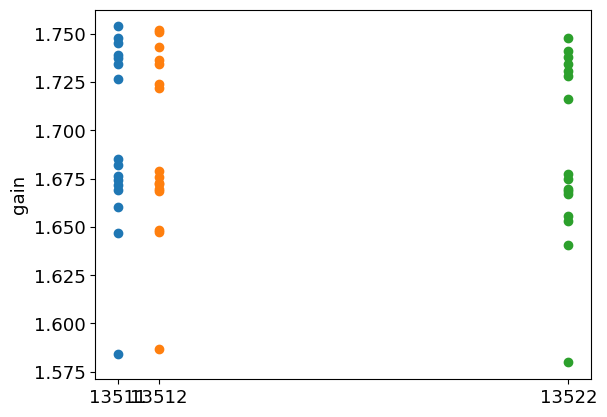

In [58]:
butler = Butler("/repo/ir2") 
registry = butler.registry
ptc1 =  butler.get('ptc', detector=23, instrument='LSSTCam', collections='u/abrought/ptc.13511.trunc_to_pcti')
ptc2 =  butler.get('ptc', detector=23, instrument='LSSTCam', collections='u/abrought/ptc.13512.trunc_to_pcti')
ptc3 =  butler.get('ptc', detector=23, instrument='LSSTCam', collections='u/abrought/ptc.13522.trunc_to_pcti')
plt.scatter([13511 for i in range(16)],ptc1.gain.values())
plt.scatter([13512 for i in range(16)],ptc2.gain.values())
plt.scatter([13522 for i in range(16)],ptc3.gain.values())
plt.ylabel("gain")
plt.xticks([13511,13512,13522])

([<matplotlib.axis.XTick at 0x7fb18430f310>,
 [Text(13511, 0, '13511'), Text(13512, 0, '13512'), Text(13522, 0, '13522')])

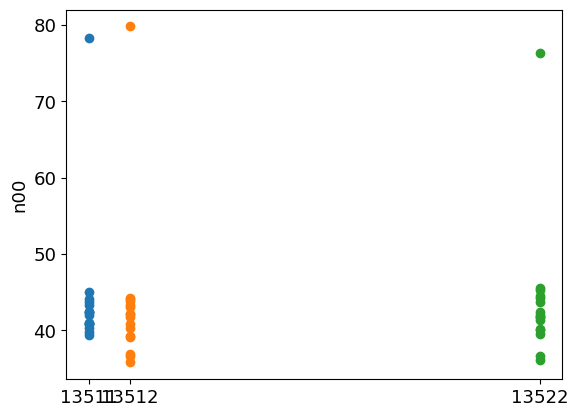

In [59]:
butler = Butler("/repo/ir2") 
registry = butler.registry
ptc1 =  butler.get('ptc', detector=23, instrument='LSSTCam', collections='u/abrought/ptc.13511.trunc_to_pcti')
ptc2 =  butler.get('ptc', detector=23, instrument='LSSTCam', collections='u/abrought/ptc.13512.trunc_to_pcti')
ptc3 =  butler.get('ptc', detector=23, instrument='LSSTCam', collections='u/abrought/ptc.13522.trunc_to_pcti')
plt.scatter([13511 for i in range(16)],ptc1.noise.values())
plt.scatter([13512 for i in range(16)],ptc2.noise.values())
plt.scatter([13522 for i in range(16)],ptc3.noise.values())
plt.ylabel("n00")
plt.xticks([13511,13512,13522])

([<matplotlib.axis.XTick at 0x7fb186db9f90>,
 [Text(13511, 0, '1'), Text(13512, 0, '2')])

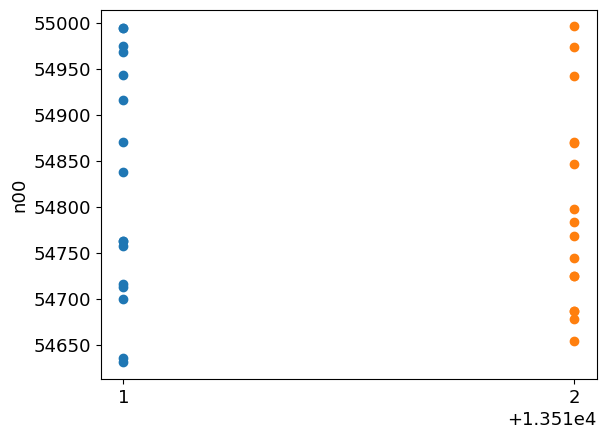

In [63]:
butler = Butler("/repo/ir2") 
registry = butler.registry
ptc1 =  butler.get('ptc', detector=23, instrument='LSSTCam', collections='u/abrought/ptc.13511.trunc_to_pcti')
ptc2 =  butler.get('ptc', detector=23, instrument='LSSTCam', collections='u/abrought/ptc.13512.trunc_to_pcti')
#ptc3 =  butler.get('ptc', detector=23, instrument='LSSTCam', collections='u/abrought/ptc.13522.trunc_to_pcti')
plt.scatter([13511 for i in range(16)],ptc1.ptcTurnoff.values())
plt.scatter([13512 for i in range(16)],ptc2.ptcTurnoff.values())
#plt.scatter([13522 for i in range(16)],ptc3.ptcTurnoff.values())
plt.ylabel("n00")
plt.xticks([13511,13512])#,13522])

In [16]:
def fit_chi2_ndof(ptc):
        """
        returns the array of chi2/ndof contributions indexed by i and j 
        """
        chi2_ndof_all = []
        bin_along_x = ()
        for i, ampobj in enumerate(camera[0].getAmplifiers()):
            amp = ampobj.getName()
            gain = ptc.gain[amp]
            expIdMask = ptc.expIdMask[amp]
            #print(np.min(ptc.rawMeans[amp]), np.max(ptc.rawMeans[amp]))
            mask2 = (ptc.rawMeans[amp]*gain < 75000)
            mask3 = expIdMask * mask2

            data = ptc.covariances[amp][mask3] * (gain**2)  # same 

            model = ptc.covariancesModel[amp][mask3] * (gain**2) 

            w = (ptc.covariancesSqrtWeights[amp][mask3] / gain)**2
            #w = np.ones(ptc.covariancesSqrtWeights[amp][mask3].shape)
            mask = w != 0
            ndof = mask.sum(axis=0)-2

            # for 0,0, count-3 is more accurate:
            ndof[0,0] -= 1
            for i in range(ndof.shape[0]):
                for j in range(ndof.shape[1]):
                    if not i==0 and not j==0:
                        ndof[i][j] *= 2
                        
            #print(ndof)
                        
            chi2_ndof = (((model-data)**2)*w).sum(axis=0)/ndof

            # handle potentially pathological cases
            chi2_ndof[np.isnan(chi2_ndof)] = -0.1
            #print(chi2_ndof)
            #print("CHI2 DIM",chi2_ndof.shape) 
            chi2_ndof_all.append(chi2_ndof[0,0])
            print(amp , chi2_ndof[0,0])
        
        return np.sum(chi2_ndof_all)

In [17]:
fit_chi2_ndof(ptc)

C10 98.00312825902492
C11 59.76826542432415
C12 103.43155459089657
C13 91.92013896630709
C14 109.71395622868643
C15 65.90244910130313
C16 139.44716719948082
C17 103.7997039517764
C07 45.51808933143247
C06 260.23558961794237
C05 55.47463699875635
C04 55.335562371901176
C03 116.88897592031338
C02 64.86015377193064
C01 273.4485347511211
C00 133.51893428116995


1777.266840766367

In [9]:
plt.figure(figsize=(8,8))

mu = ptc.finalMeans['C00']
expmask = ptc.expIdMask['C00']
g = ptc.gain['C00']
c00 = ptc.covariances['C00'][:,1,0]
c00_model = ptc.covariancesModel['C00'][:,1,0]
n00 = ptc.noise['C00']
r = (c00 / mu**2) -  (n00/g**2)/(mu**2)

r_model = (c00_model / mu**2) - (n00/g**2)/(mu**2)



mu2 = ptc2.finalMeans['C00']
expmask2 = ptc2.expIdMask['C00']
g2 = ptc2.gain['C00']
c002 = ptc2.covariances['C00'][:,1,0]
c002_model = ptc2.covariancesModel['C00'][:,1,0]
n002 = ptc2.noiseMatrix['C00'][1,0]
r2 = (c002 / mu2**2) -  (n002/g2**2)/(mu2**2)

r2_model = (c002_model / mu2**2) - (n002/g2**2)/(mu2**2)


mu3 = ptc3.finalMeans['C00']
g3 = ptc3.gain['C00']
c003 = ptc3.covariances['C00'][:,1,0]
c003_model = ptc3.covariancesModel['C00'][:,1,0]
expmask3 = ptc3.expIdMask['C00']
n003 = ptc3.noiseMatrix['C00'][1,0]
r3 = (c003 / mu3**2) - (n003/g3**2)/(mu3**2)

r3_model = (c003_model / mu3**2) - (n003/g3**2)/(mu3**2)


plt.scatter(mu*g,r, marker="o", edgecolor="orange", s=5, facecolor="None", label="Run 13511 (run 6)", alpha=0.5)#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])
plt.scatter(mu2*g2,r2, marker="o", edgecolor="#4c8bf5", s=5,  facecolor="None", label="Run 13144 (run 5)", alpha=0.5)#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])
plt.plot(mu2[mu2*g2 < 1e5]*g2,r2_model[mu2*g2 < 1e5], "o-", ms=0, c="#4c8bf5", label="Run 13144 (run 5)\nfull covariance model")#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])
#plt.axhline(ptc2.aMatrix['C00'][0][0], color="#4c8bf5", linestyle="--", label="Run 5 $a_{00}$")

plt.scatter(mu3*g3,r3, marker="o", edgecolor="r", s=5,  facecolor="None", label="Run 13511 (run 6)", alpha=0.5)#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])
plt.plot(mu3[mu3*g2 < 1e5]*g3,r3_model[mu3*g2 < 1e5], "o-", ms=0, c="r", label="Run 13511 (run 6)\nfull covariance\n(up to pCTI turnoff)")#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])
#plt.axhline(ptc3.aMatrix['C00'][0][0], color="r", linestyle="--", label="Run 6 $a_{00}$")

plt.ylim(-1e-7,6e-7)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0), useMathText=True)
plt.axvline(np.min(pcti_turnoffs) , linestyle=":", color="black", label="pCTI turnoff", alpha=0.5)
plt.axvline(np.min(ptc_turnoffs) , linestyle="--", color="black", label="PTC turnoff", alpha=0.5)

plt.xlim(0,2.0e5)
plt.legend(ncol=2)
plt.xlabel(r"$\mu$ [el]")
plt.title("R03-S12 (det=23), C00")
plt.ylabel("$C_{10}/\mu^2 - (n_{10}/g^{2})/\mu^2$")

NameError: name 'ptc3' is not defined

<Figure size 800x800 with 0 Axes>

Text(0, 0.5, '$C_{11}/\\mu^2 - (n_{11}/g^{2})/\\mu^2$')

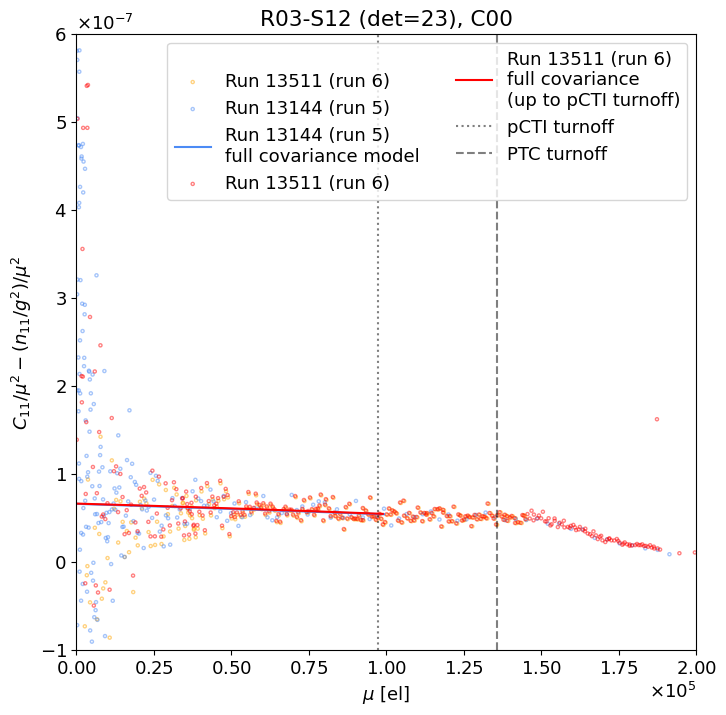

In [35]:
plt.figure(figsize=(8,8))

mu = ptc.finalMeans['C00']
expmask = ptc.expIdMask['C00']
g = ptc.gain['C00']
c00 = ptc.covariances['C00'][:,1,1]
c00_model = ptc.covariancesModel['C00'][:,1,1]
n00 = ptc.noise['C00']
r = (c00 / mu**2) -  (n00/g**2)/(mu**2)

r_model = (c00_model / mu**2) - (n00/g**2)/(mu**2)



mu2 = ptc2.finalMeans['C00']
expmask2 = ptc2.expIdMask['C00']
g2 = ptc2.gain['C00']
c002 = ptc2.covariances['C00'][:,1,1]
c002_model = ptc2.covariancesModel['C00'][:,1,1]
n002 = ptc2.noiseMatrix['C00'][1,1]
r2 = (c002 / mu2**2) -  (n002/g2**2)/(mu2**2)

r2_model = (c002_model / mu2**2) - (n002/g2**2)/(mu2**2)


mu3 = ptc3.finalMeans['C00']
g3 = ptc3.gain['C00']
c003 = ptc3.covariances['C00'][:,1,1]
c003_model = ptc3.covariancesModel['C00'][:,1,1]
expmask3 = ptc3.expIdMask['C00']
n003 = ptc3.noiseMatrix['C00'][1,1]
r3 = (c003 / mu3**2) - (n003/g3**2)/(mu3**2)

r3_model = (c003_model / mu3**2) - (n003/g3**2)/(mu3**2)


plt.scatter(mu*g,r, marker="o", edgecolor="orange", s=5, facecolor="None", label="Run 13511 (run 6)", alpha=0.5)#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])
plt.scatter(mu2*g2,r2, marker="o", edgecolor="#4c8bf5", s=5,  facecolor="None", label="Run 13144 (run 5)", alpha=0.5)#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])
plt.plot(mu2[mu2*g2 < 1e5]*g2,r2_model[mu2*g2 < 1e5], "o-", ms=0, c="#4c8bf5", label="Run 13144 (run 5)\nfull covariance model")#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])
#plt.axhline(ptc2.aMatrix['C00'][0][0], color="#4c8bf5", linestyle="--", label="Run 5 $a_{00}$")

plt.scatter(mu3*g3,r3, marker="o", edgecolor="r", s=5,  facecolor="None", label="Run 13511 (run 6)", alpha=0.5)#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])
plt.plot(mu3[mu3*g2 < 1e5]*g3,r3_model[mu3*g2 < 1e5], "o-", ms=0, c="r", label="Run 13511 (run 6)\nfull covariance\n(up to pCTI turnoff)")#,ptc.rawVars['C00']*ptc.gain['C00']*ptc.gain['C00'] / ptc.rawMeans['C00']*ptc.gain['C00'])
#plt.axhline(ptc3.aMatrix['C00'][0][0], color="r", linestyle="--", label="Run 6 $a_{00}$")

plt.ylim(-1e-7,6e-7)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0), useMathText=True)
plt.axvline(np.min(pcti_turnoffs) , linestyle=":", color="black", label="pCTI turnoff", alpha=0.5)
plt.axvline(np.min(ptc_turnoffs) , linestyle="--", color="black", label="PTC turnoff", alpha=0.5)

plt.xlim(0,2.0e5)
plt.legend(ncol=2)
plt.xlabel(r"$\mu$ [el]")
plt.title("R03-S12 (det=23), C00")
plt.ylabel("$C_{11}/\mu^2 - (n_{11}/g^{2})/\mu^2$")

0.45447076280907883
0.47121551579493604
0.4730625939989262
0.5045931947334318
0.3786927367430703
0.4330600730767514
0.49146865499994724
0.44055370282840156
1.3109746316876703
0.43919640348981437
0.5017409645797757
0.47592314981288003
0.3828381542926599
0.4249438371116691
0.48678145941119866
0.4314894955622908


Text(0.5, 0.98, 'MEDIAN_PER_ROW OVERSCAN')

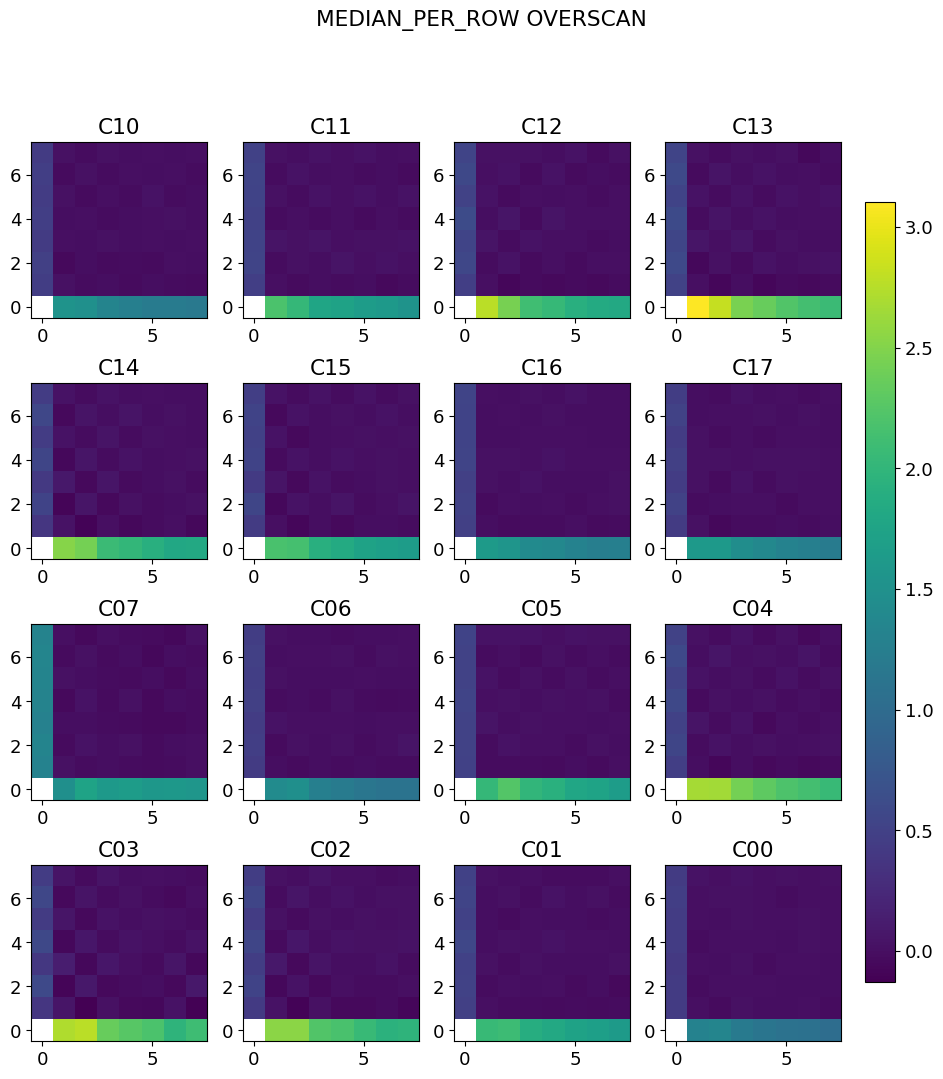

In [43]:
n_ij = ptc3.noiseMatrix
n_ijs = np.concatenate(list(n_ij.values()))
mx = np.nanmax(n_ijs)
mn = np.nanmin(n_ijs)
fig,axs = plt.subplots(4,4,figsize=(12,12))
axs=axs.flatten()
for i, amp in enumerate(camera[0].getAmplifiers()):
    ampname = amp.getName()
    print(n_ij[ampname][0][1])
    #n_ij[ampname][0][0] = np.nan
    
    im = axs[i].imshow(n_ij[ampname].T, origin='lower', vmin=mn, vmax=mx)
    axs[i].set_title(ampname)
    #axs[i].plot([-0.5,0.5], [-0.5,0.5], "r-")
    #axs[i].plot([-0.5,0.5], [0.5,-0.5], "r-")
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.170, 0.025, 0.65])
fig.colorbar(im, cax=cbar_ax)

plt.suptitle("MEDIAN_PER_ROW OVERSCAN")
    

-0.1771552600554327
-0.15380958519451537
-0.1326473318059245
-0.1777823538954279
-0.2865067792774618
-0.12091421287777349
-0.12657077801875086
0.17618366554943685
-0.024555993243435645
-0.2019411293662365
-0.27534068423506775
-0.25284880242893565
-0.2087822096728287
-0.06837966372120177
-0.029430250618010283
-0.06745964885135612


Text(0.5, 0.98, 'MEDIAN_PER_ROW OVERSCAN')

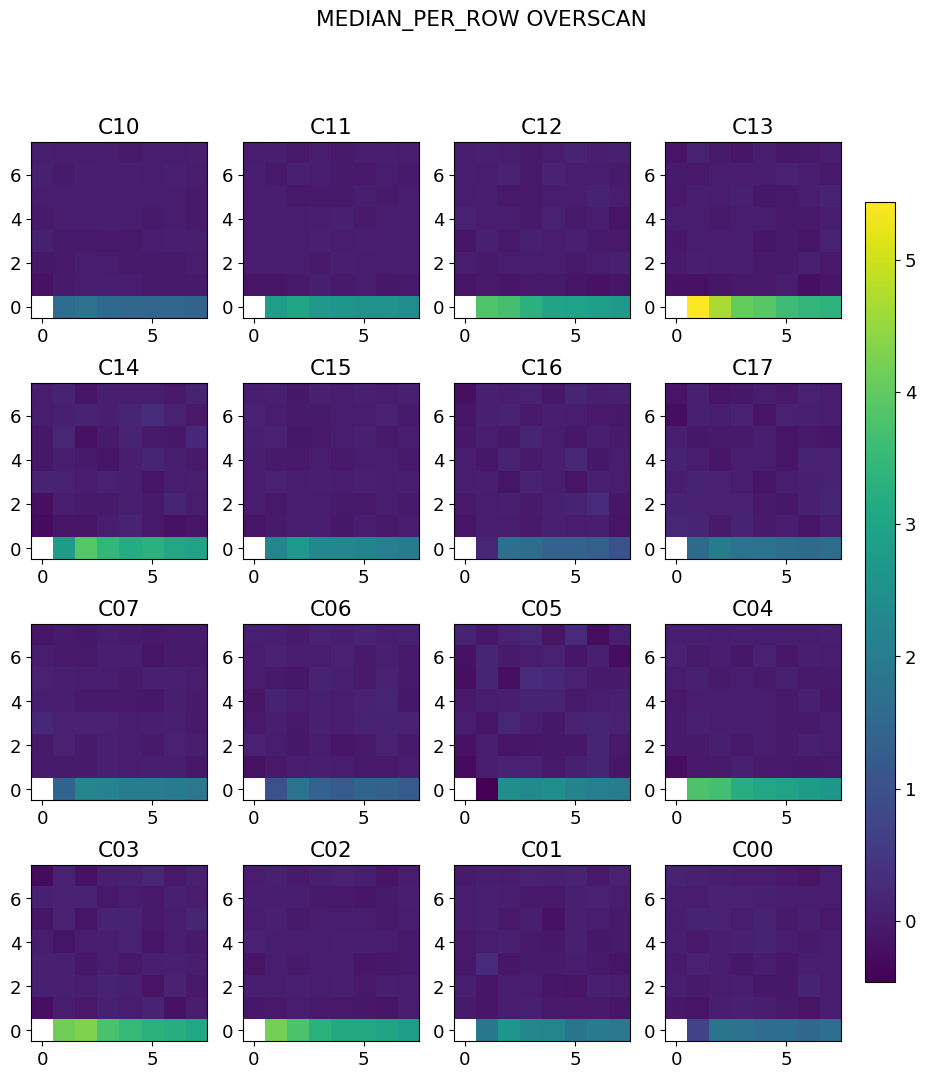

In [47]:
n_ij = ptc2.noiseMatrix
n_ijs = np.concatenate(list(n_ij.values()))
mx = np.nanmax(n_ijs)
mn = np.nanmin(n_ijs)
fig,axs = plt.subplots(4,4,figsize=(12,12))
axs=axs.flatten()
for i, amp in enumerate(camera[0].getAmplifiers()):
    ampname = amp.getName()
    print(n_ij[ampname][0][1])
    n_ij[ampname][0][0] = np.nan
    
    im = axs[i].imshow(n_ij[ampname].T, origin='lower', vmin=mn, vmax=mx)
    axs[i].set_title(ampname)
    #axs[i].plot([-0.5,0.5], [-0.5,0.5], "r-")
    #axs[i].plot([-0.5,0.5], [0.5,-0.5], "r-")
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.170, 0.025, 0.65])
fig.colorbar(im, cax=cbar_ax)

plt.suptitle("MEDIAN_PER_ROW OVERSCAN")
    

## R24-S11
__________

In [ ]:
import matplotlib.gridspec as gridspec

from lsst.daf.butler import Butler

from lsst.obs.lsst import LsstCam
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 13})

sensor="R24_S11"
det = 112
fa = 0.791
amp = 'C00'
butler = Butler("/repo/main") 
ptc = butler.get('ptc', detector=det, instrument='LSSTCam', collections='u/abrought/BF/2023.09.15/ptc.R24-S11.trunc_to_newpcti')

import sys
sys.path.append('/sdf/home/a/abrought/bin')
from SpotAnalysis import *
ptc_turnoffs, scti_turnoffs, pcti_turnoffs, moss, gains = getSensorData(sensor=sensor, detector=det)

camera = LsstCam().getCamera()
detector = camera.get(sensor)

def avg_dict(d, exclude_channels=[]):

        t = np.zeros((8,8))
        for k,channel in zip(d.values(), d.keys()):
            if channel in exclude_channels:
                continue

            t += k
        return t / len(d.values())

def avg_dict2(d, exclude_channels=[]):

        t = np.zeros((338,8,8))
        for k,channel in zip(d.values(), d.keys()):
            if channel in exclude_channels:
                continue

            t += k
        return t / len(d.values())

gains = []
for l, channel in enumerate(camera[0].getAmplifiers()):
    #print(l,channel.getName())
    gains.append(ptc.gain[channel.getName()])

fig = plt.figure(figsize=(12,15))
gs = gridspec.GridSpec(2, 1, height_ratios=[4,1], hspace=0.3*.5)
sub_fig = fig.subfigures(3, 3)
for i in range(3):
    for j in range(3): # 00->20 01->10
        ax1 = sub_fig[2-j][i].add_subplot(gs[0])
        ax2 = sub_fig[2-j][i].add_subplot(gs[1])
        l = 1
        mask = np.asarray(ptc.expIdMask[amp])
        print(mask.sum())
        n  = ptc.noiseMatrix[amp]
        g  = ptc.gain[amp] 
        mu = np.asarray(ptc.rawMeans[amp])
        C  = np.asarray(ptc.covariances[amp])[:,i,j]
        C_model = np.asarray(ptc.covariancesModel[amp])[:,i,j]
        if i==0 and j==0 and l==1:
            ax1.scatter(mu*g, (C / mu**2) - (mu/g + n[0][0]/g**2)/(mu**2), s=7,edgecolor="k", facecolor="None", alpha=0.5)
            ax1.plot(mu[mask]*g, (C_model[mask] / mu[mask]**2) - (mu[mask]/g + n[0][0]/g**2)/(mu[mask]**2), "-", color='k')
            #residual = ((C[mask] / mu[mask]**2) - (mu[mask]/g + n/g**2)/(mu[mask]**2) - ((C_model[mask] / mu[mask]**2) - (mu[mask]/g + n/g**2)/(mu[mask]**2))) / ((C_model[mask] / mu[mask]**2) - (mu[mask]/g + n/g**2)/(mu[mask]**2)) 
            #ax2.scatter(mu[mask]*g, residual, s=2, color='#4c8bf5', alpha=0.25)
            ax2.set_ylim(-0.2,0.2)
            ax2.set_xlim(0,2.0e5)
            #ax2.set_ylabel(r"$\frac{Data - Model}{Model}$", labelpad=0)
            ax1.set_ylim(-3.5e-6,0.e-6)
            #ax1.set_title(r"$a_{00} = \frac{1}{\mu^2}\left [ C_{00} - \left ( \frac{\mu}{g} + \frac{n_{00}}{g^2}\right ) \right ]$")
            ax1.set_title(f'({i},{j})'.format(i,j))
        elif i==0 and j==0:
            ax1.scatter(mu*g, (C / mu**2) - (mu/g + n[0][0]/g**2)/(mu**2), s=7, edgecolor="k", facecolor="None", alpha=0.5)
        elif i==2 and j==2 and l==0:
            ax1.scatter(mu*g,  C / mu**2 - (n[i][j]/g**2)/mu**2 , s=7,edgecolor="k", facecolor="None", alpha=0.5, label="Data (Run 5 EO tests)")
            ax1.set_ylim(-1e-7,6e-7)
            ax1.set_title(f'({i},{j})'.format(i,j))
        else:

            ax1.scatter(mu*g,  C / mu**2  - (n[i][j]/g**2)/mu**2, s=7,edgecolor="k", facecolor="None", alpha=0.5)
            ax1.set_ylim(-1e-7,6e-7)
            ax1.set_title(f'({i},{j})'.format(i,j))
        
        #

        if i==0 and j==0:

            mask = np.asarray(ptc.expIdMask[amp])
            C  = np.asarray(ptc.covariances[amp])[:,i,j]
            C_model = np.asarray(ptc.covariancesModel[amp])[:,i,j]
            res1 = ((C / mu**2) - (mu/g + n[0][0]/g**2))
            res2 = ((C_model / mu**2) - (mu/g + n[0][0]/g**2))
            residual = (C - C_model) / C_model
            ax2.scatter(mu * ptc.gain[amp],residual, s=7,edgecolor="k", facecolor="None", alpha=0.5)

            ax2.set_xlim(0,2.0e5)
            ax2.set_ylabel(r"$\frac{Data - Model}{Model}$", labelpad=0)
            ax2.set_xlabel("Signal [el]")
        else:
            ax1.plot(mu[mask] * np.mean(gains),C_model[mask] / mu[mask]**2 - (n[i][j]/g**2)/mu[mask]**2 , "-", color='k', label="Astier+19 Eqn. 20 model")

            mask = np.asarray(ptc.expIdMask[amp])
            C  = np.asarray(ptc.covariances[amp])[:,i,j]
            C_model = np.asarray(ptc.covariancesModel[amp])[:,i,j]
            residual = ((C / mu**2) - (C_model / mu**2)) / (C_model / mu**2)
            ax2.scatter(mu * ptc.gain[amp],residual, s=7,edgecolor="k", facecolor="None", alpha=0.5)
            ax2.set_ylim(-1,1)
            ax2.set_xlim(0,2.0e5)
                
        if 2-j==0 or i==2:
            ax2.set_ylim(-3.0,3.0)
            ax2.set_yticks([-3.0,3.0])
            pass
        
        
        ax1.axhline(ptc.aMatrix[amp][i][j], color="#4c8bf5", linewidth=1, linestyle="-", label=r"$a_{\,i\,j}$")
        A = get_prekernel_matrix(ptc, amp, cov_samples[sensor])
        ax1.axhline(A[i][j], color="#4c8bf5", linewidth=1,linestyle="--", label=r'$\widetilde{C}_{\,i\,j}\,(\mu_*)$')
        ax1.set_xlim(0,2.0e5)
        ax2.set_xlabel("Signal [el]", labelpad=-0.25)
        ax2.set_ylabel(r"$\Delta C_{\,i\,j}\:/\:C_{\,i\,j}^{\,MODEL}$", labelpad=0)
        ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        #ax1.xaxis.major.formatter._useMathText = True
        ax1.yaxis.major.formatter._useMathText = True
        
        ax1.axvline(np.min(pcti_turnoffs) , linestyle=":", color="black", label="pCTI turnoff", alpha=0.5)
        ax2.axvline(np.min(pcti_turnoffs) , linestyle=":", color="black", alpha=0.5)
        ax1.axvline(np.min(ptc_turnoffs) , linestyle="--", color="black", label="PTC turnoff", alpha=0.5)
        ax2.axvline(np.min(ptc_turnoffs) , linestyle="--", color="black", alpha=0.5)
        ax1.axvline(np.min(scti_turnoffs) , linestyle="-", color="black", label="sCTI turnoff", alpha=0.5)
        ax2.axvline(np.min(scti_turnoffs) , linestyle="-", color="black", alpha=0.5)
        
        ax2.axhline(0.0, linestyle="-", linewidth=0.5, color="k", alpha=0.5)
        
        if i==0 and j==0:
            ax2.axhline(0.0, linestyle="--", linewidth=0.5, color="k", alpha=0.5)
            ax2.set_ylim(-0.010,0.010)
            ax2.set_yticks([-0.01,0.01])
        #elif 2-j==1 and i==0:
        #    ax1.set_ylabel(r"$\widetilde{C}_{\,i\,j}\;/\;\mu^2$ [el$^{-1}$]")
        if i==2 and j==2:
            ax1.legend(frameon=True, ncol=1,fontsize=10, loc=1)
        plt.setp( ax1.get_xticklabels(), visible=False)
        ax2.ticklabel_format(axis="x", style="sci", scilimits=(0,0), useMathText=True)
        #ax1.set_title(f"$a_{{\:{i}\:{j}}}$")
        #ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)
        ax1.set_ylabel(r"$\widetilde{C}_{\,i\,j}\;/\;\mu^2$ [el$^{-1}$]")
        

#axs[0][1].set_title(r'$a_{01}$')
#axs[0][2].set_title(r'$a_{02}$')
#axs[1][0].set_title(r'$a_{10}$')
#axs[2][0].set_title(r'$a_{20}$')
#axs[1][1].set_title(r'$a_{11}$')
#axs[2][2].set_title(r'$a_{22}$')
#axs[2][1].set_title(r'$a_{21}$')
#axs[1][2].set_title(r'$a_{12}$')
#axs[2][0].set_xlabel("Signal [el]")
#axs[2][1].set_xlabel("Signal [el]")
#axs[2][2].set_xlabel("Signal [el]")


plt.savefig("../plots/analytical_a_matrix_e2v.png", bbox_inches="tight")

In [16]:
butler = Butler("/repo/ir2") 
ptc_blue = butler.get('ptc', detector=det, instrument='LSSTCam', collections='u/lsstccs/ptc_13511_w_2023_41')
ptc_red = butler.get('ptc', detector=det, instrument='LSSTCam', collections='u/lsstccs/ptc_13512_w_2023_41')
ptc_uv = butler.get('ptc', detector=det, instrument='LSSTCam', collections='u/lsstccs/ptc_13522_w_2023_41')

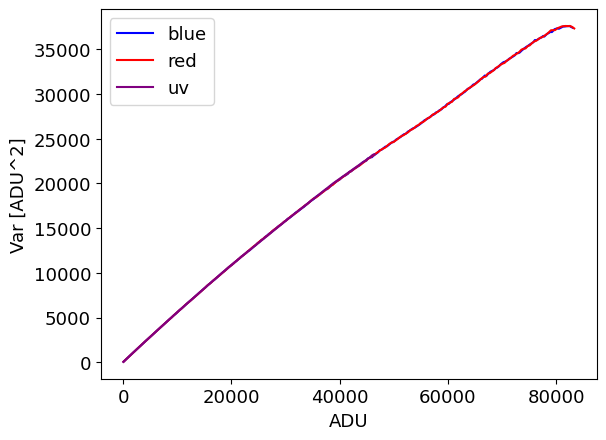

In [40]:
plt.plot(ptc_blue.finalMeans['C00'],ptc_blue.finalVars['C00'], color="blue",label="blue")
plt.plot(ptc_red.finalMeans['C00'],ptc_red.finalVars['C00'], color="red",label="red")
plt.plot(ptc_uv.finalMeans['C00'],ptc_uv.finalVars['C00'], color="purple",label="uv")
plt.xlabel("ADU")
plt.ylabel("Var [ADU^2]")
plt.legend()

In [31]:
config = butler.get('isr_config', detector=det, instrument='LSSTCam', collections='u/lsstccs/ptc_13522_w_2023_41')

In [36]:
config.doLinearize

False

In [22]:
ptc_uv.finalModelVars

{'C10': array([   41.41040893,    48.1172459 ,    56.46838894,    77.89378451,
           93.72620557,   112.86499731,   137.36283465,   167.66086224,
          205.11216026,   251.68882887,   310.1657503 ,   382.43160155,
          471.72546242,   583.12255744,   717.12770658,  1124.6141066 ,
         2161.96350153,  2663.40563702,  3368.71136842,  4066.73509042,
         6427.91025044,  9813.97453886, 11897.70455337, 18459.12306955,
        22354.98690746, 25773.63788531, 25908.78443019, 25993.37072897,
        26119.20860181, 26154.41514993]),
 'C11': array([   41.91680566,    48.39365137,    56.41450075,    76.82009697,
           92.02097538,   110.32249174,   133.86078638,   162.83174758,
          198.86867179,   243.48260404,   299.35229425,   368.63946798,
          454.27431783,   561.1032034 ,   689.47057421,  1080.09255956,
         2075.22859076,  2556.38693673,  3233.74772597,  3904.63311571,
         6175.82834698,  9438.9380442 , 11450.25821175, 17797.46148432,
        

In [29]:
print(ptc_uv.aMatrix['C00'][0][0])
print(ptc_red.aMatrix['C00'][0][0])
print(ptc_blue.aMatrix['C00'][0][0])

-1.6053076831094336e-06
nan
nan


# 1. PTC Chromaticity

**UV**: Run 13522, u/abrought/ptc.13511.trunc_to_pcti

**Blue**: Run 13511, u/abrought/ptc.13511.trunc_to_pcti

**Red**: Run 13512, u/abrought/ptc.13511.trunc_to_pcti

In [9]:
butler = Butler("/repo/ir2") 
registry = butler.registry
registry.refresh()
ptc_uv =  butler.get('ptc', detector=23, instrument='LSSTCam', collections='u/abrought/ptc.R03-S12.13522.trun_to_ptc')
ptc_blue =  butler.get('ptc', detector=23, instrument='LSSTCam', collections='u/abrought/ptc.R03-S12.13511.trun_to_ptc')
ptc_red =  butler.get('ptc', detector=23, instrument='LSSTCam', collections='u/abrought/ptc.R03-S12.13512.trun_to_ptc')



In [10]:
ptc_blue.rawMeans['C00']

array([52957.25863695])